# Library and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Training_Dataset_v2.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(1)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,No,No,No,Yes,No,No


# Null Values

In [4]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

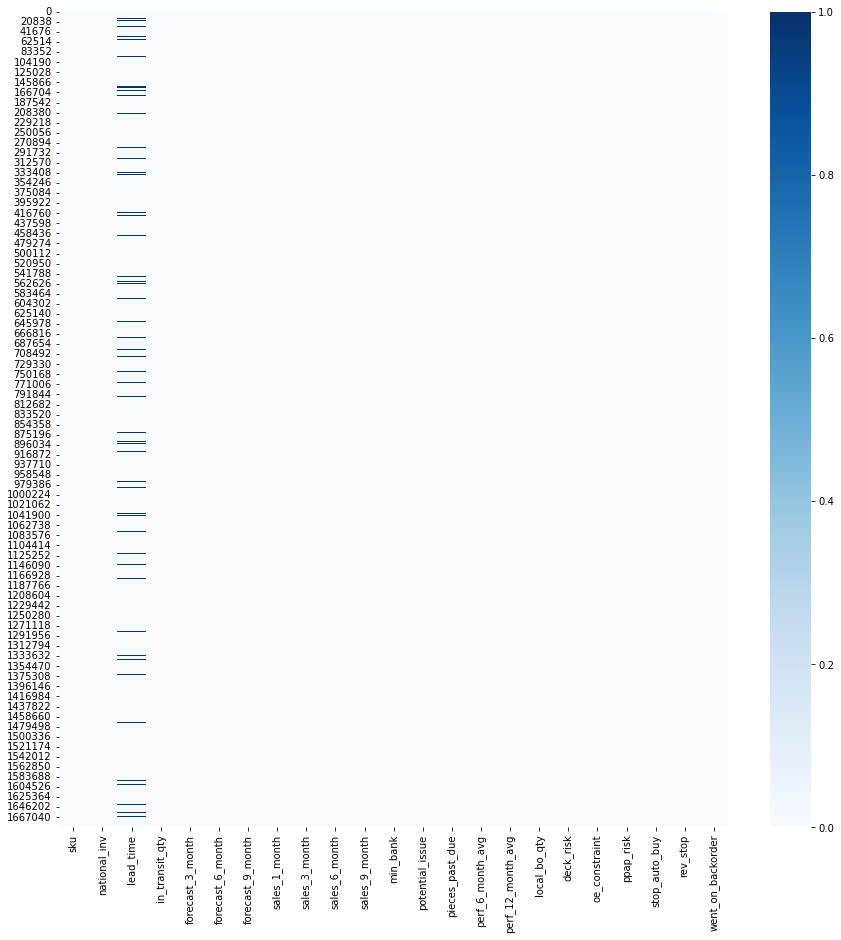

In [6]:
# Heatmap for Null value
plt.figure(figsize = (15,15))
sns.heatmap(df.isnull(), cmap = 'Blues')
plt.show()

# Distribution of Features


In [7]:
# Replacing Null values with Median value
df['lead_time']=df.lead_time.fillna(df.lead_time.median())

In [8]:
# Replace -99 values to Nan
df.perf_6_month_avg.replace({-99.00:np.nan}, inplace=True)
df.perf_12_month_avg.replace({-99.00:np.nan}, inplace=True)

In [9]:
#impute null with median
df.perf_6_month_avg.fillna(df.perf_6_month_avg.median(), inplace=True)
#impute null with median
df.perf_12_month_avg.fillna(df.perf_12_month_avg.median(), inplace=True)

In [10]:
# df_num.skew()

In [11]:
df_num = df.select_dtypes(include = np.number)

In [12]:
df_num.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [13]:
df_num = df_num.iloc[:1687860, :]

In [14]:
df_num.skew()

national_inv         340.285800
lead_time              4.695413
in_transit_qty       166.183404
forecast_3_month     138.968325
forecast_6_month     138.961427
forecast_9_month     143.298875
sales_1_month        196.119990
sales_3_month        141.286380
sales_6_month        139.176712
sales_9_month        135.054191
min_bank             131.212649
pieces_past_due      412.391900
perf_6_month_avg      -1.700319
perf_12_month_avg     -1.720717
local_bo_qty         165.190548
dtype: float64

In [15]:
from scipy.stats import zscore

In [16]:
n_z = zscore(df_num)

In [17]:
df_ss = pd.DataFrame(data = n_z, columns = df_num.columns)

In [18]:
df_ss.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,-0.016752,0.017553,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.042050,-0.008659,0.273282,0.221151,-0.018577
1,-0.016684,0.163710,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.042050,-0.008659,0.886103,0.940496,-0.018577
2,-0.016684,0.017553,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.042050,-0.008659,0.273282,0.221151,-0.018577
3,-0.016516,0.017553,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,-0.041253,-0.008659,-3.009688,-2.925980,-0.018577
4,-0.016482,0.017553,-0.032808,-0.035436,-0.03522,-0.035216,-0.029004,-0.033708,-0.035548,-0.035129,-0.040457,-0.008659,0.273282,0.221151,-0.018577


In [19]:
round(df_ss['forecast_3_month'].describe(),2)

count    1687860.00
mean           0.00
std            1.00
min           -0.04
25%           -0.04
50%           -0.04
75%           -0.03
max          283.98
Name: forecast_3_month, dtype: float64

In [20]:
df_ss.skew()

national_inv         340.285800
lead_time              4.695413
in_transit_qty       166.183404
forecast_3_month     138.968325
forecast_6_month     138.961427
forecast_9_month     143.298875
sales_1_month        196.119990
sales_3_month        141.286380
sales_6_month        139.176712
sales_9_month        135.054191
min_bank             131.212649
pieces_past_due      412.391900
perf_6_month_avg      -1.700319
perf_12_month_avg     -1.720717
local_bo_qty         165.190548
dtype: float64

In [21]:
df_num.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.879902e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,7.875683e-01,7.808104e-01,6.264507e-01
std,2.961523e+04,6.841952e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.284518e-01,2.224248e-01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.300000e-01,7.200000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.500000e-01,8.300000e-01,0.000000e+00
75%,8.000000e+01,8.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [22]:
df_num.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003321,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,0.003929,0.002697,0.014887
lead_time,0.003321,1.000000,-0.006863,-0.008045,-0.008548,-0.008773,-0.005618,-0.006769,-0.007117,-0.007261,-0.007094,-0.001510,-0.005622,-0.004414,-0.001259
in_transit_qty,0.098238,-0.006863,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.004300,0.001344,0.066612
forecast_3_month,0.078199,-0.008045,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.006057,0.002815,0.039419
forecast_6_month,0.079744,-0.008548,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.006827,0.003187,0.039724
forecast_9_month,0.078948,-0.008773,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.007113,0.003243,0.039732
sales_1_month,0.147449,-0.005618,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.006216,0.001909,0.066188
sales_3_month,0.192605,-0.006769,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.006804,0.001913,0.071030
sales_6_month,0.225067,-0.007117,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.006859,0.001683,0.057765
sales_9_month,0.239613,-0.007261,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.007138,0.002067,0.048880


In [23]:
df['went_on_backorder'][df['went_on_backorder'] == 'Yes'].describe()

count     11293
unique        1
top         Yes
freq      11293
Name: went_on_backorder, dtype: object

## Analysis - Charts

#### Uni-Variate Analysis

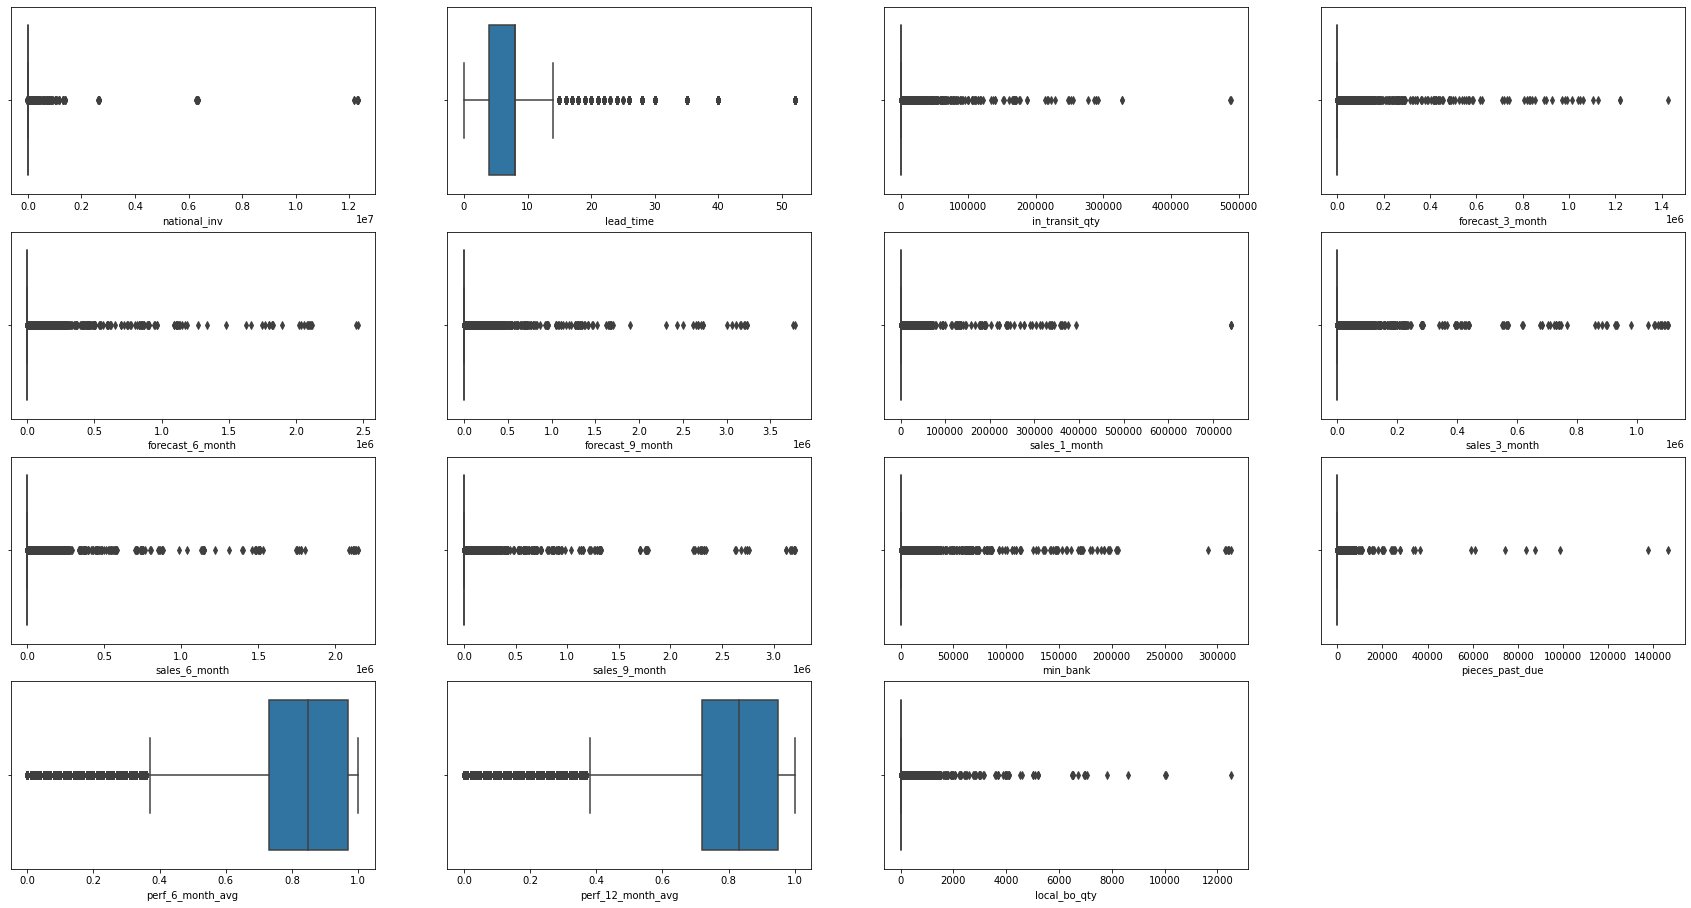

In [24]:
1### Box Plot to see outliers with orginal data after imputing null values with median
j = 1
plt.figure(figsize = (30,20))
for i in df_num.columns:
  plt.subplot(5,4,j)
  sns.boxplot(x = df_num[i])
  j+=1

plt.show()

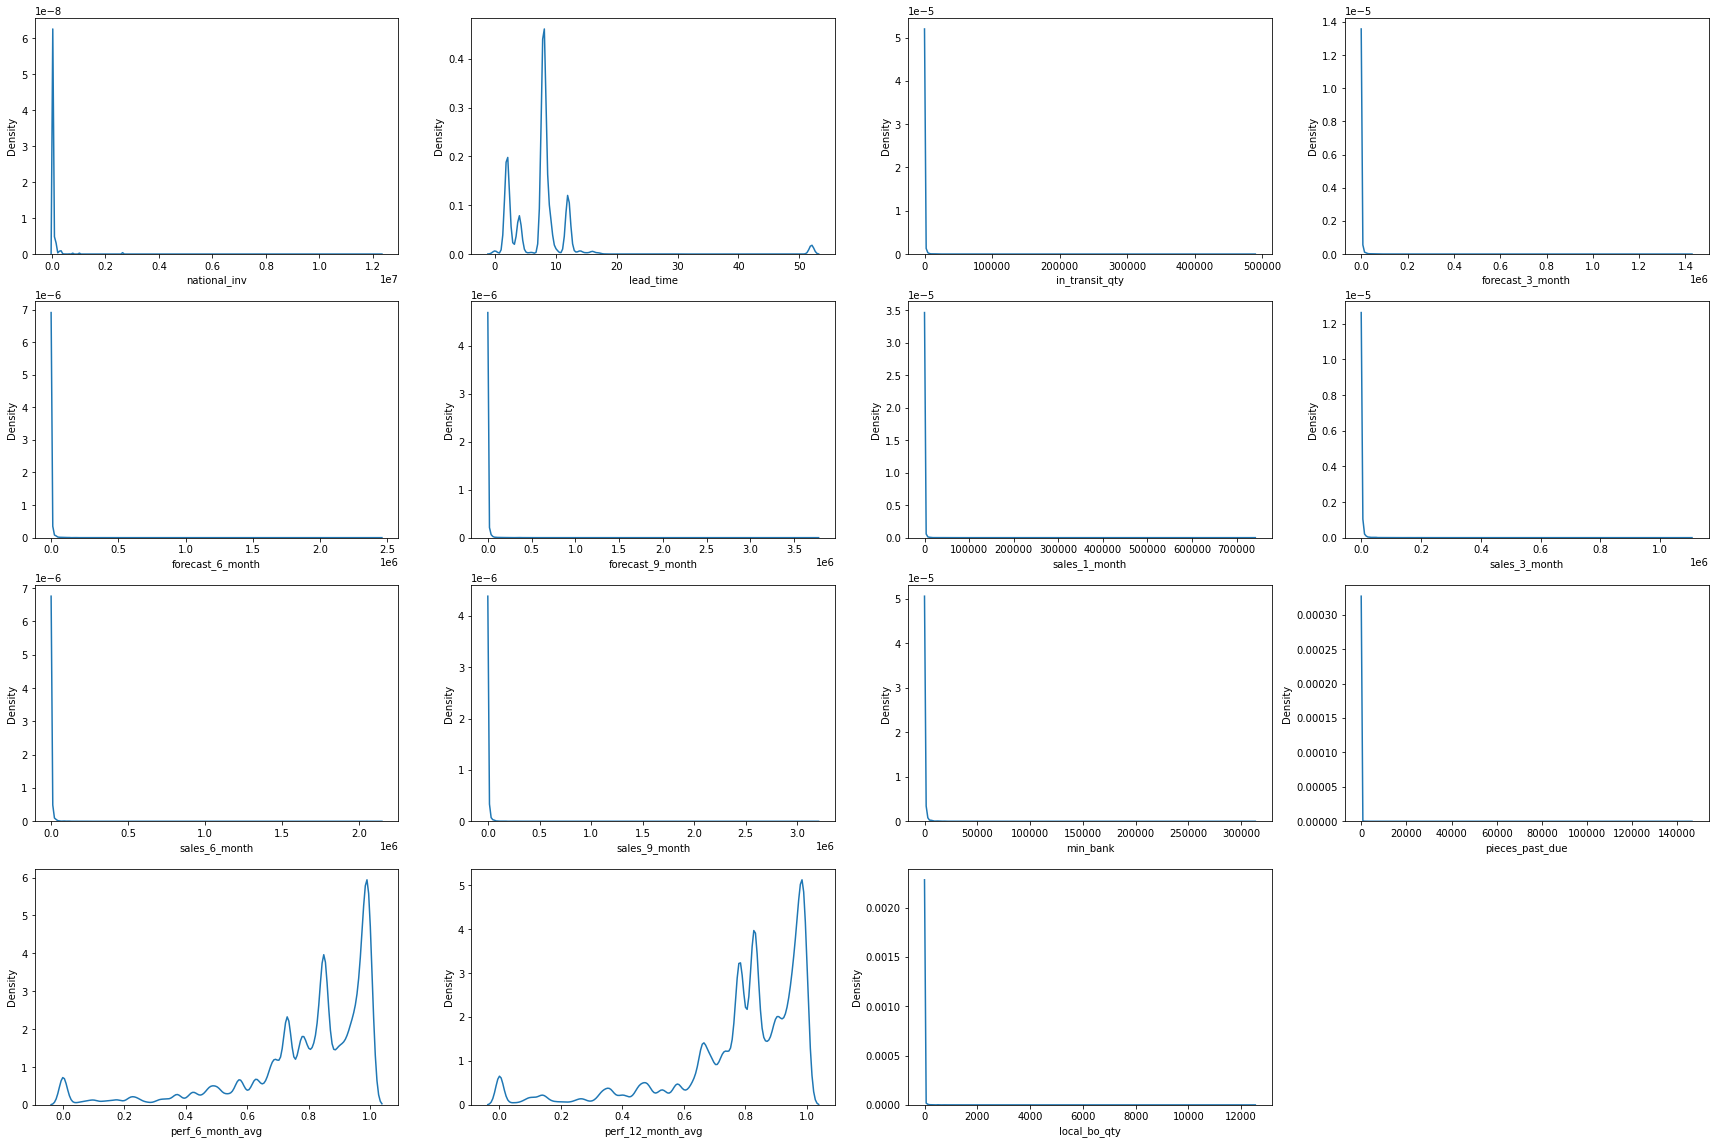

In [25]:
# Distribution Curve with Orginal Data after median imputation for Null values
j = 1
plt.figure(figsize = (30,20))
for i in df_num.columns:
  plt.subplot(4,4,j)
  sns.kdeplot(df_num[i])
  j+=1
plt.show()

In [47]:
df_cat1 = df.select_dtypes(include = 'object').drop('sku', axis = 1)

In [27]:
df_cat = pd.get_dummies(data = df_cat1, drop_first = True)

In [28]:
df_cat['sku'] = df['sku']

In [29]:
df_cat.set_index('sku').head()

,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
sku,,,,,,,
1026827,0,0,0,0,1,0,0
1043384,0,0,0,0,1,0,0
1043696,0,1,0,0,1,0,0
1043852,0,0,0,0,1,0,0
1044048,0,1,0,0,1,0,0


In [30]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   potential_issue_Yes    1687861 non-null  uint8 
 1   deck_risk_Yes          1687861 non-null  uint8 
 2   oe_constraint_Yes      1687861 non-null  uint8 
 3   ppap_risk_Yes          1687861 non-null  uint8 
 4   stop_auto_buy_Yes      1687861 non-null  uint8 
 5   rev_stop_Yes           1687861 non-null  uint8 
 6   went_on_backorder_Yes  1687861 non-null  uint8 
 7   sku                    1687861 non-null  object
dtypes: object(1), uint8(7)
memory usage: 24.1+ MB


In [31]:
df_cat1 = df_cat.drop('sku', 1)

C:\Users\TAMILS~1\AppData\Local\Temp/ipykernel_5000/1802485385.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cat1 = df_cat.drop('sku', 1)


In [32]:
df_num.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
dtype: int64

In [33]:
df_cat = df_cat.iloc[:1687860, ]

#### Bi-variate

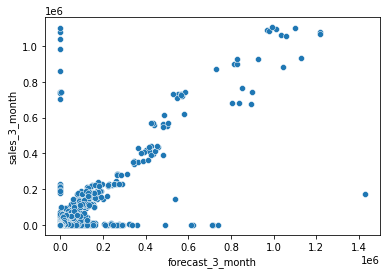

In [34]:
sns.scatterplot(x = df_num['forecast_3_month'], y = df_num['sales_3_month'])

plt.show()


# We can see majority of the products that are fast moving are correctly predicted in forecast for data of 3 months, but some products with sales of about 100-200qty have been
# not forecasted this may be due to part may be obsolete / discontinues

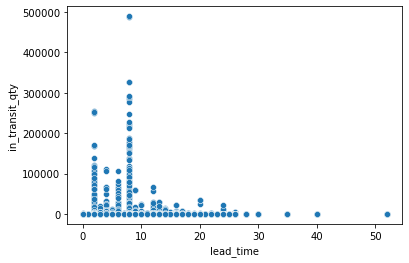

In [35]:
# Bivariate Analysis

sns.scatterplot(x = df_num['lead_time'], y = df_num['in_transit_qty'])
plt.show()

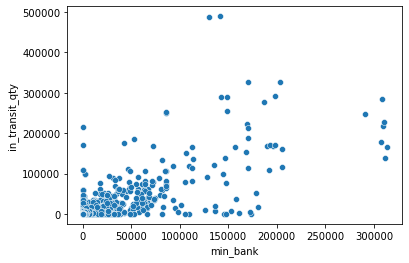

In [36]:
sns.scatterplot(x = df_num['min_bank'], y = df_num['in_transit_qty'])
plt.show()

# min_bank and in_Transit_qty

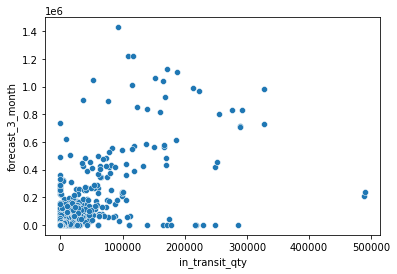

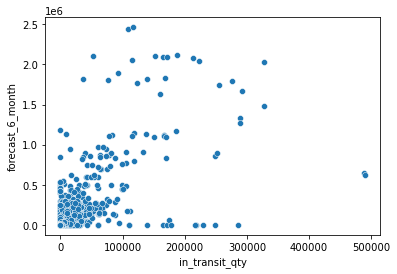

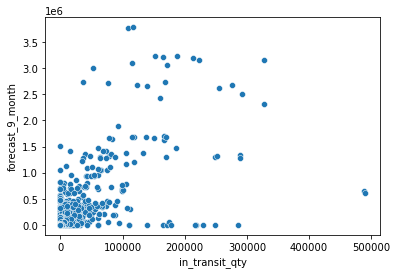

In [37]:

sns.scatterplot(y = df_num['forecast_3_month'], x = df_num['in_transit_qty'])
plt.show()

sns.scatterplot(y = df_num['forecast_6_month'], x = df_num['in_transit_qty'])
plt.show()

sns.scatterplot(y = df_num['forecast_9_month'], x = df_num['in_transit_qty'])
plt.show()

# forecast_3_month vs In-transit qty

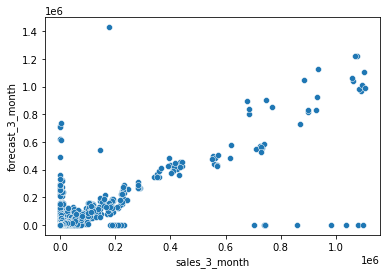

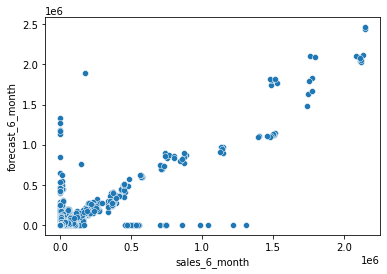

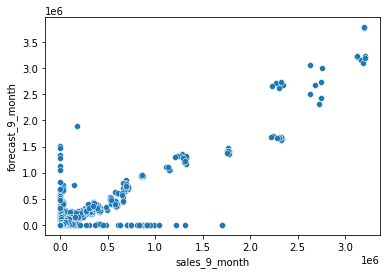

In [38]:
sns.scatterplot(y = df_num['forecast_3_month'], x = df_num['sales_3_month'])
plt.show()

sns.scatterplot(y = df_num['forecast_6_month'], x = df_num['sales_6_month'])
plt.show()

sns.scatterplot(y = df_num['forecast_9_month'], x = df_num['sales_9_month'])
plt.show()

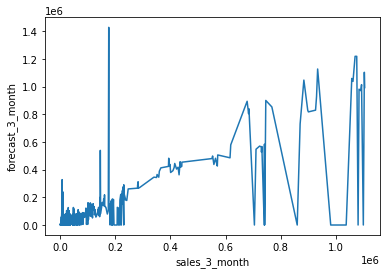

In [39]:
sns.lineplot(y = df_num['forecast_3_month'], x = df_num['sales_3_month'])
plt.show()

In [40]:
df_cat.columns

Index(['potential_issue_Yes', 'deck_risk_Yes', 'oe_constraint_Yes',
       'ppap_risk_Yes', 'stop_auto_buy_Yes', 'rev_stop_Yes',
       'went_on_backorder_Yes', 'sku'],
      dtype='object')

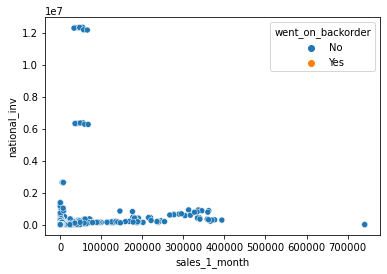

In [41]:
sns.scatterplot(x = df_num['sales_1_month'], y = df_num['national_inv'], hue = df['went_on_backorder'] )
plt.show()

# sales_1_month vs national_inv

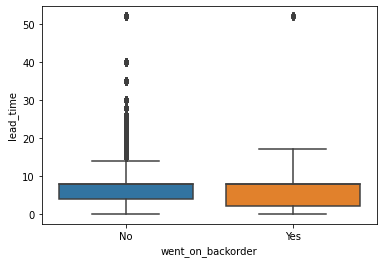

In [42]:
# Boxplot Went_on_backorder and Lead Time
sns.boxplot(x = df['went_on_backorder'], y = df_num['lead_time'], data = df)
plt.show()

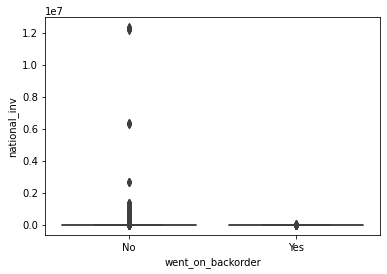

In [43]:
sns.boxplot(x = df['went_on_backorder'], y = df['national_inv'])
plt.show()

# National_inv vs Target variable (went_on_backorder)

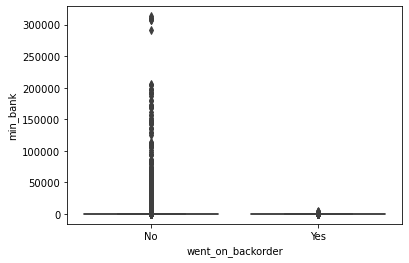

In [44]:
sns.boxplot(x = df['went_on_backorder'], y = df['min_bank'])
plt.show()

# min_bank vs Target variable (went_on_backorder)

In [45]:
df_cat1.columns

Index(['potential_issue_Yes', 'deck_risk_Yes', 'oe_constraint_Yes',
       'ppap_risk_Yes', 'stop_auto_buy_Yes', 'rev_stop_Yes',
       'went_on_backorder_Yes'],
      dtype='object')

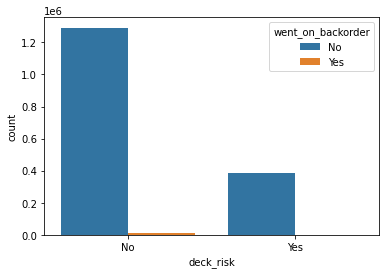

In [48]:
sns.countplot(x = df_cat1['deck_risk'], hue = df_cat1['went_on_backorder'])
plt.show()

# Part risk flag (deck_risk) vs went_on_backorder

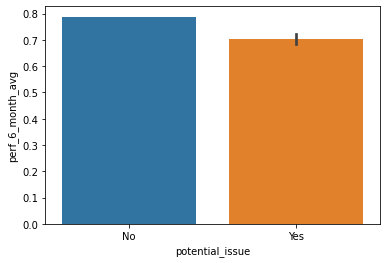

In [49]:
sns.barplot(y = df_num['perf_6_month_avg'], x = df_cat1['potential_issue'])
plt.show()

# Performance of 6 month average (% from 0 to 1) and potential issue (Yes/No) 

#### Multi-Variate - Heat Map

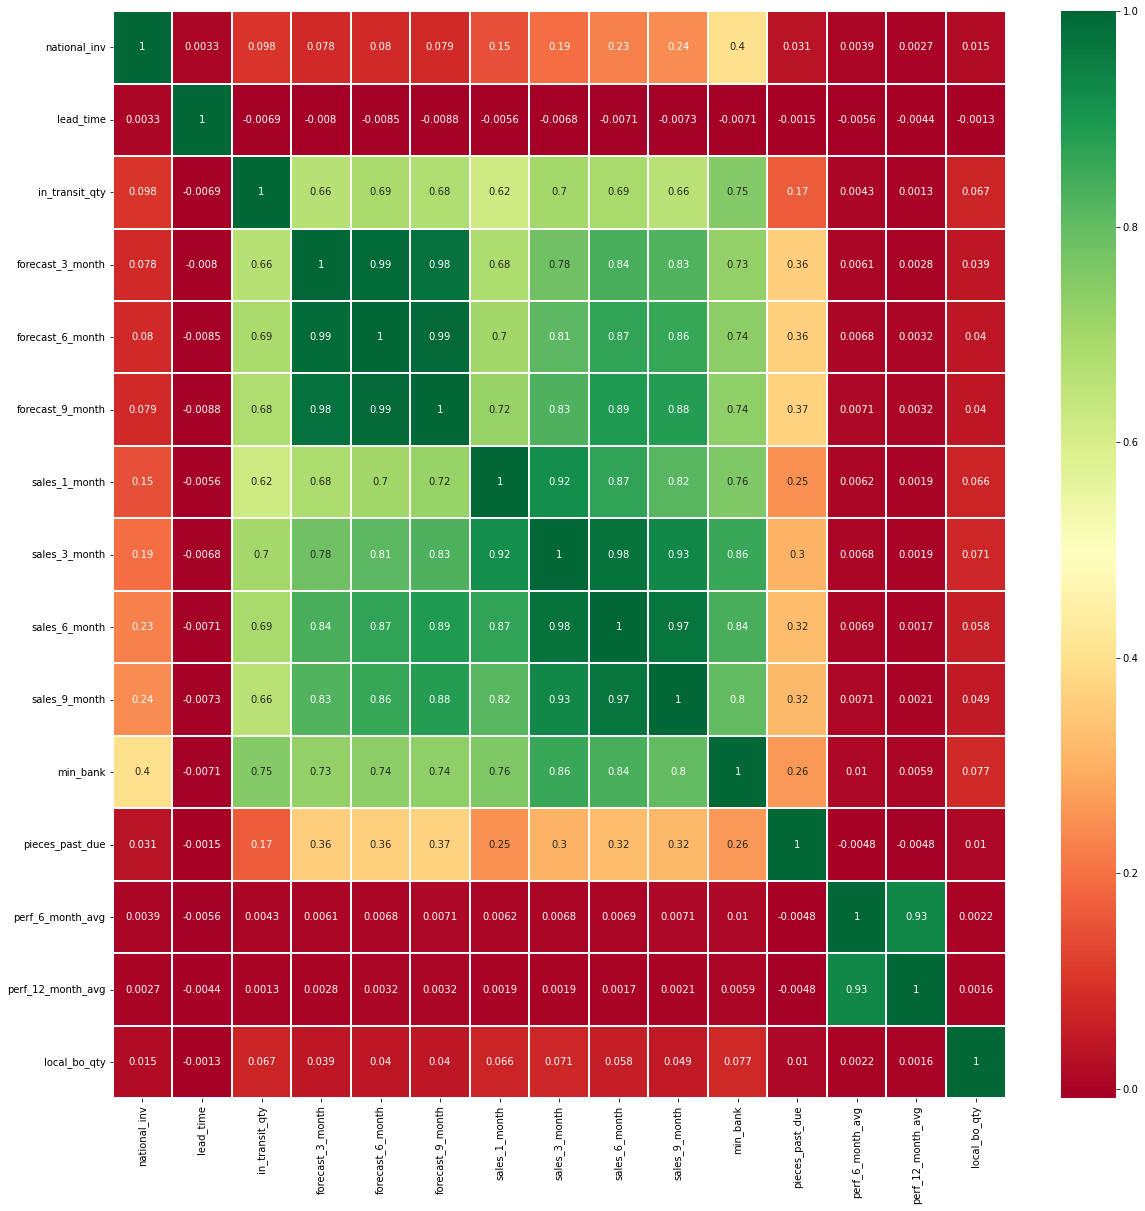

In [50]:
# Heatmap for Numerical Variables
plt.figure(figsize = (20,20))
sns.heatmap(df_num.corr(), annot = True, cmap ='RdYlGn', linewidth = 0.15)
plt.show()

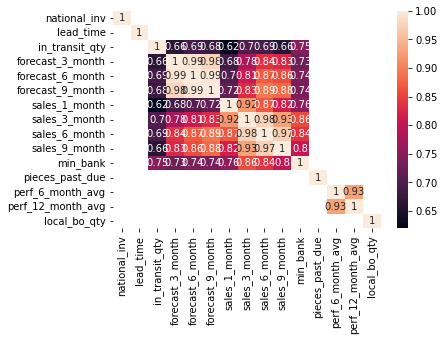

In [51]:
# Heatmap with highly correlated

sns.heatmap(df_num.corr()[df_num.corr()>0.5], annot=True)
plt.show()

#### Subplots

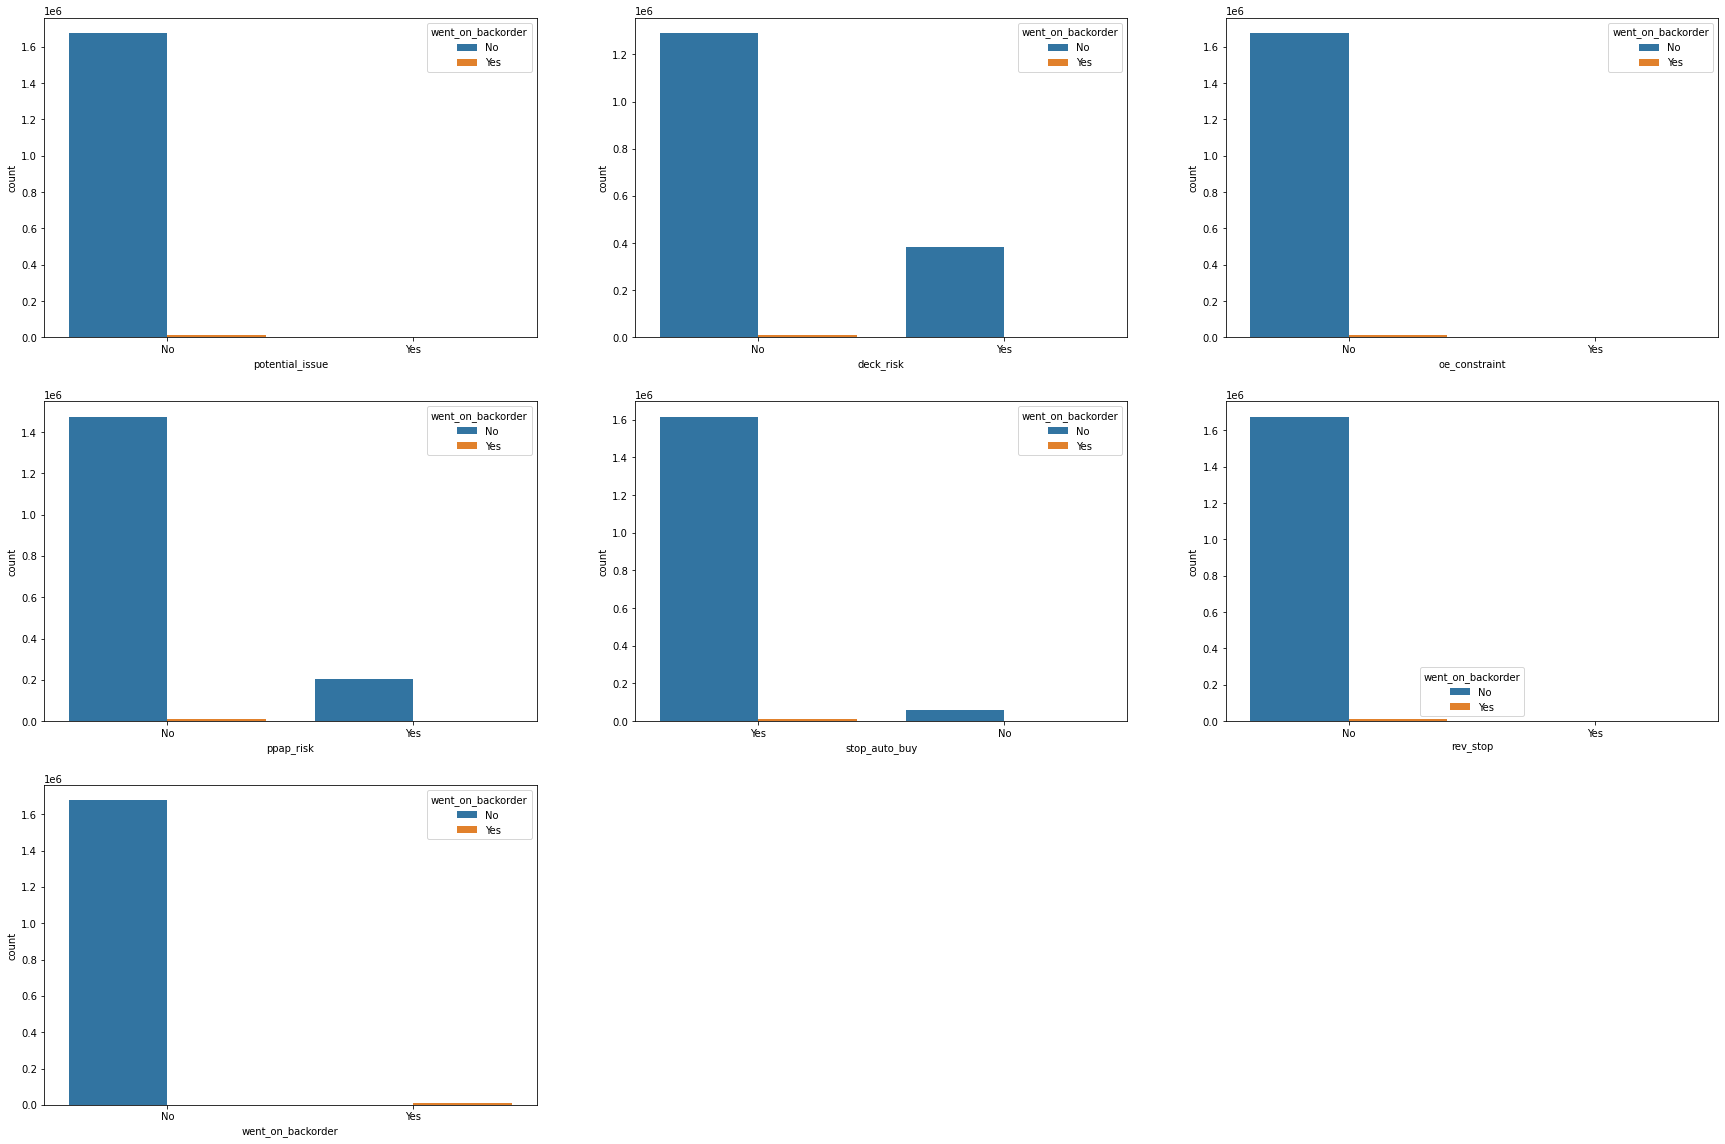

In [55]:
# categorical columns with target variable (went_on_target) as hue
from warnings import filterwarnings
filterwarnings("ignore")
j = 1
plt.figure(figsize = (30,20))
for i in df_cat1.columns:
  plt.subplot(3,3,j)
  sns.countplot(df_cat1[i],hue = df["went_on_backorder"])
  j+=1
plt.show()

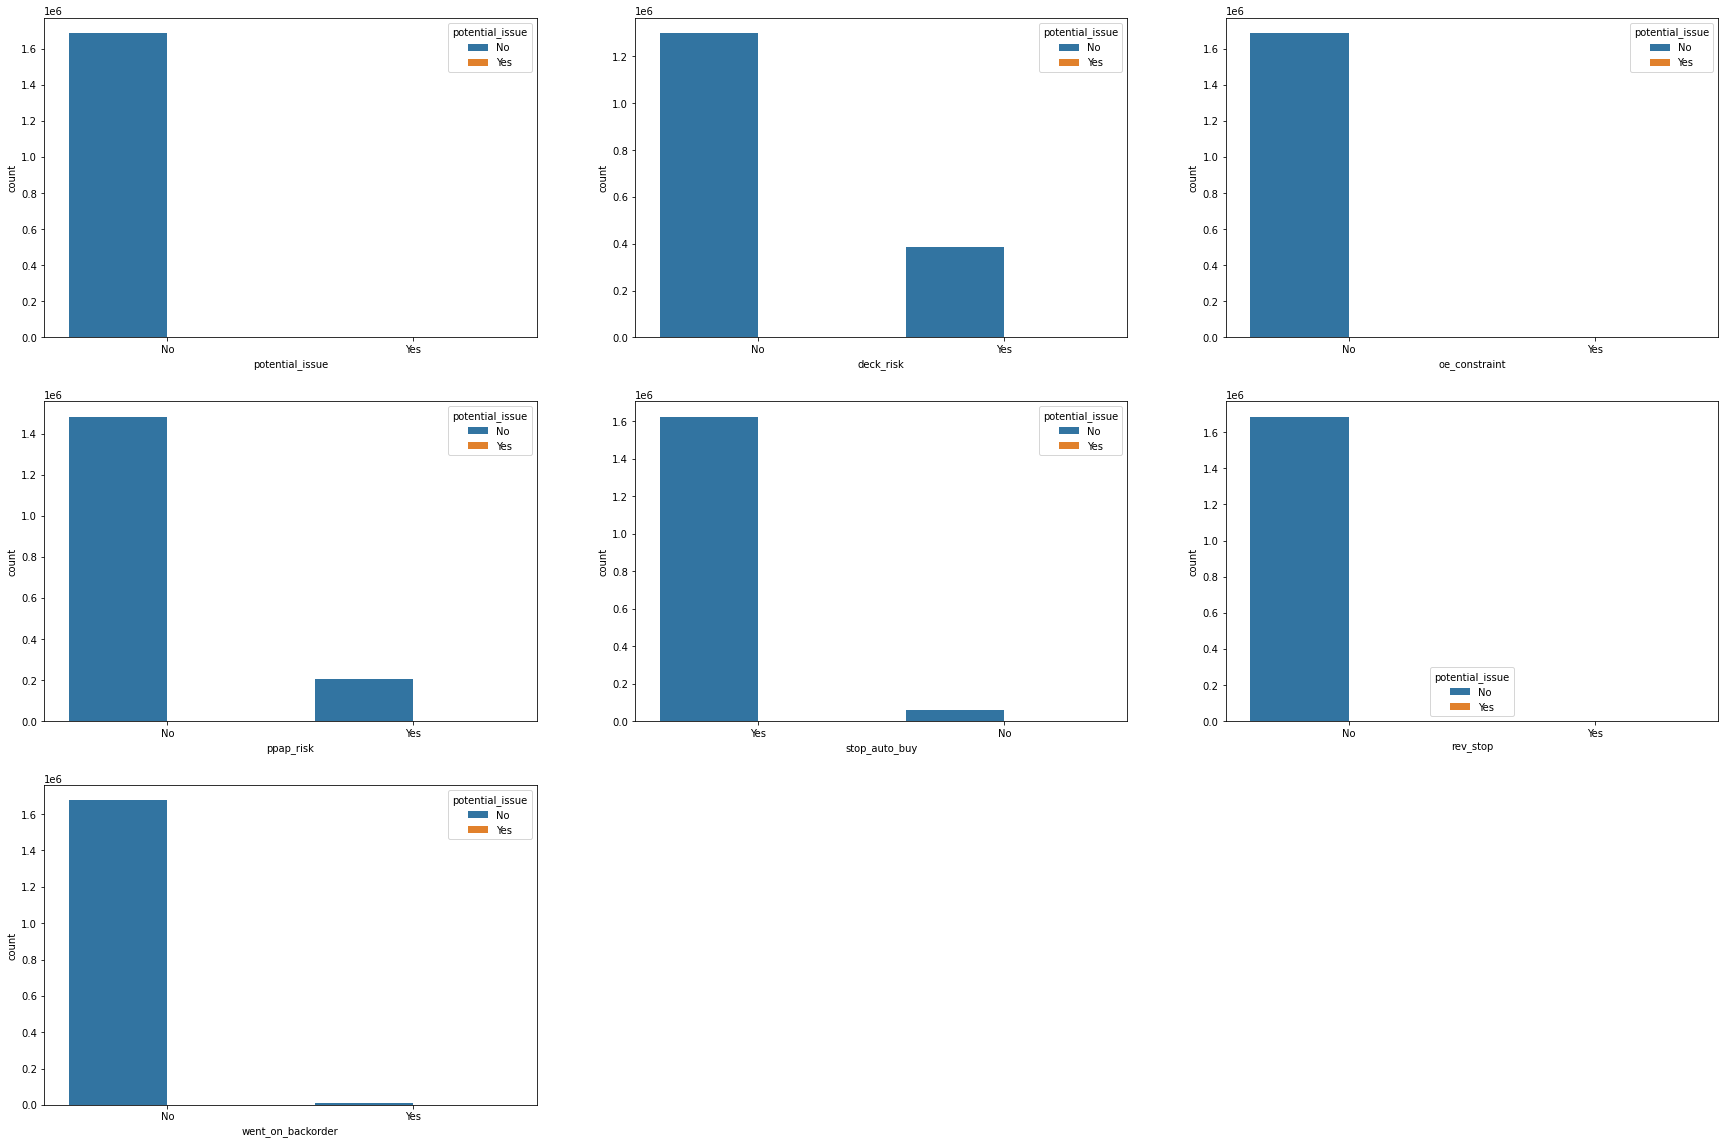

In [56]:
# categorical columns with target variable (potential_issue) as hue

j = 1
plt.figure(figsize = (30,20))
for i in df_cat1.columns:
  plt.subplot(3,3,j)
  sns.countplot(x = df_cat1[i], hue = df_cat1['potential_issue'])
  j+=1

plt.show()

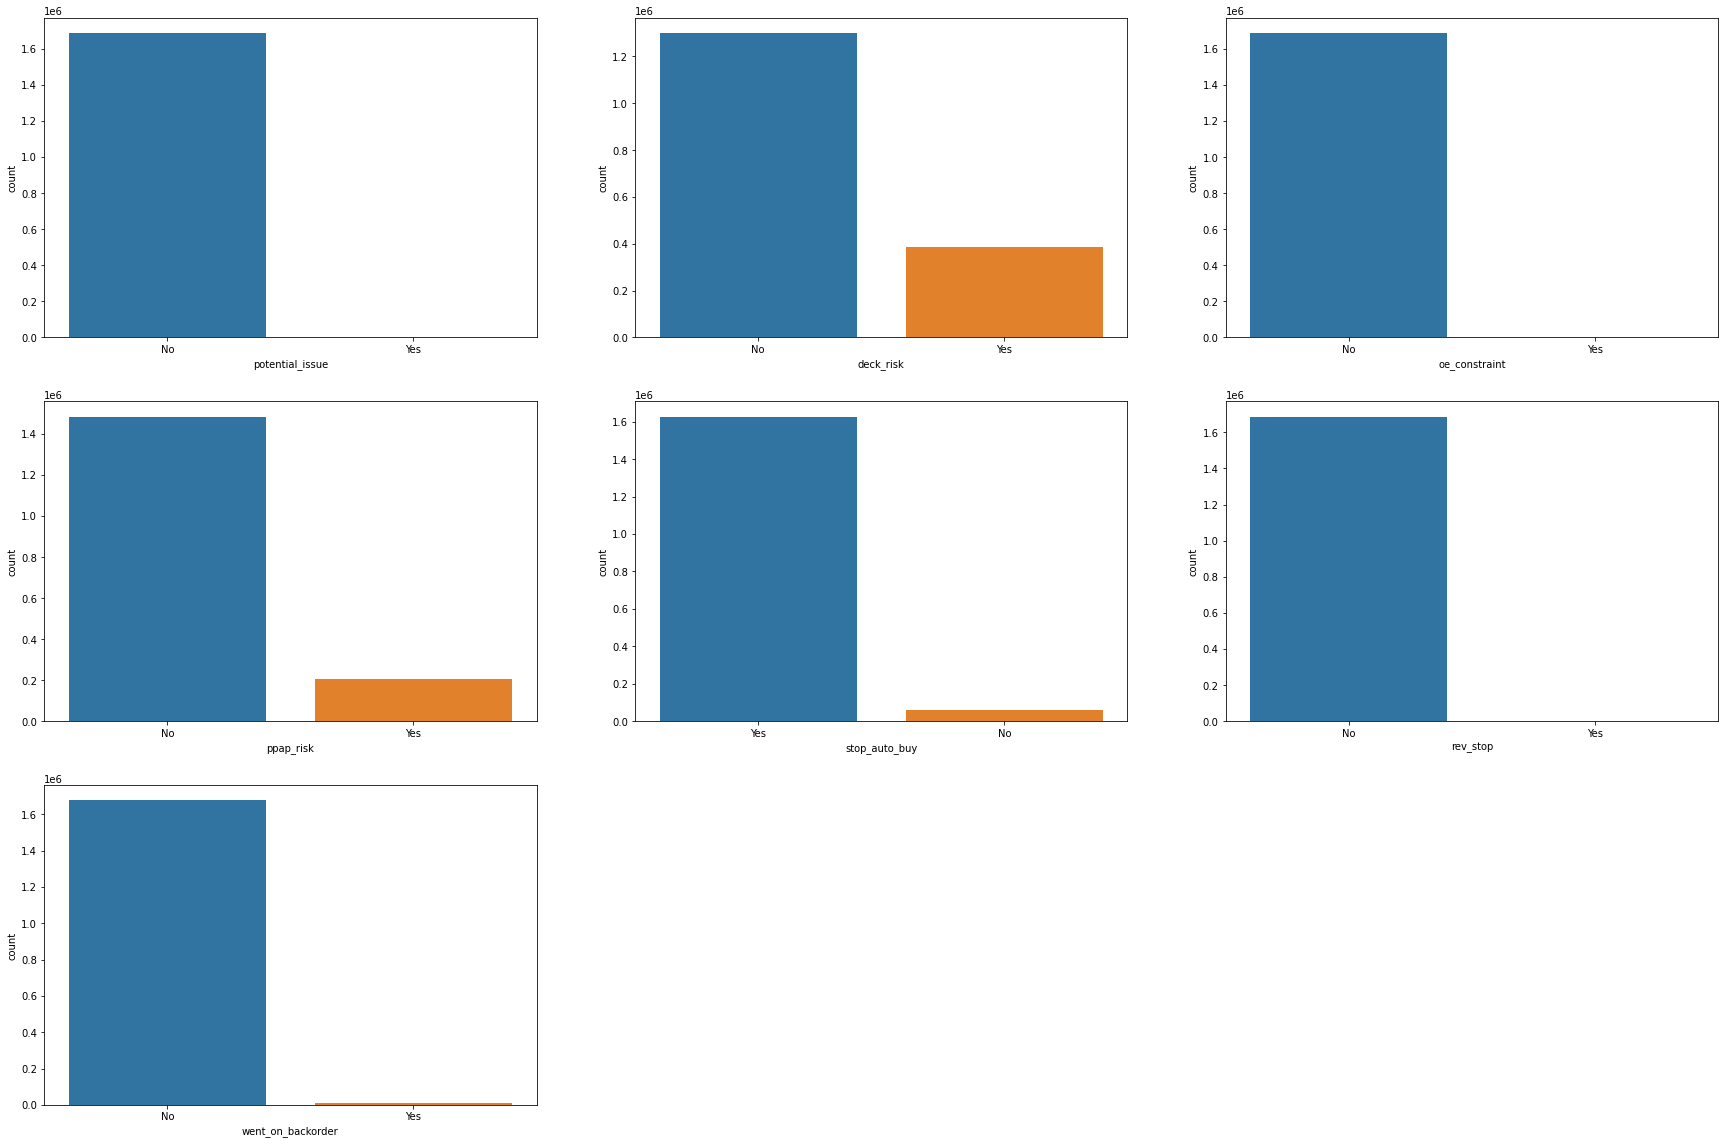

In [57]:
# Countplot for all categorical columns

j = 1
plt.figure(figsize = (30,20))
for i in df_cat1.columns:
  plt.subplot(3,3,j)
  sns.countplot(x = df_cat1[i])
  j+=1

plt.show()

In [58]:
df_cat1['deck_risk'].value_counts(normalize = True) * 100

No     77.042942
Yes    22.957058
Name: deck_risk, dtype: float64

In [59]:
round(df_cat1['ppap_risk'].value_counts(normalize = True) * 100,2)

No     87.92
Yes    12.08
Name: ppap_risk, dtype: float64

#### Groupby of Sales and Target Variable

In [60]:
df.groupby(df['went_on_backorder']).agg({'sales_1_month' : ['mean','min','max'], 'sales_3_month' : ['mean','min','max']})

sales_1_month                sales_3_month                
                           mean  min       max          mean  min        max
went_on_backorder                                                           
No                    56.104982  0.0  741774.0    175.670378  0.0  1105478.0
Yes                   29.364474  0.0   20005.0     79.350748  0.0    20033.0

In [61]:
df.groupby(df['went_on_backorder']).agg({'sales_3_month' : ['mean','min','max']})

sales_3_month                
                           mean  min        max
went_on_backorder                              
No                   175.670378  0.0  1105478.0
Yes                   79.350748  0.0    20033.0

In [62]:
df.groupby(df['went_on_backorder']).agg({'sales_6_month' : ['mean','min','max'], 'sales_9_month' : ['mean','min','max']})

sales_6_month                 sales_9_month                
                           mean  min        max          mean  min        max
went_on_backorder                                                            
No                   343.092551  0.0  2146625.0    527.417690  0.0  3205172.0
Yes                  139.271230  0.0    27893.0    206.377668  0.0    43796.0

In [63]:
df.groupby(df['went_on_backorder']).agg({'sales_9_month' : ['mean','min','max']})

sales_9_month                
                           mean  min        max
went_on_backorder                              
No                   527.417690  0.0  3205172.0
Yes                  206.377668  0.0    43796.0

#### Crosstabs of risk flag and target variable

In [64]:
pd.crosstab(df_cat1['deck_risk'], df_cat1['went_on_backorder'])

went_on_backorder,No,Yes
deck_risk,,
No,1291000,9377
Yes,385567,1916


In [65]:
pd.crosstab(df_cat1['stop_auto_buy'], df_cat1['went_on_backorder'])

went_on_backorder,No,Yes
stop_auto_buy,,
No,60615,471
Yes,1615952,10822


In [66]:
pd.crosstab(df_cat1['ppap_risk'], df_cat1['went_on_backorder'])

went_on_backorder,No,Yes
ppap_risk,,
No,1474492,9534
Yes,202075,1759


#### Performance 6 month and 12 month - Binning with Target Variable

In [67]:
df_num['perf_6_bin'] = pd.qcut(df_num['perf_6_month_avg'], q = 4)

In [68]:
df_num['perf_6_bin'].value_counts()

(-0.001, 0.73]    517895
(0.73, 0.85]      423620
(0.85, 0.97]      386648
(0.97, 1.0]       359697
Name: perf_6_bin, dtype: int64

In [69]:
pd.crosstab(df_num['perf_6_bin'], df['went_on_backorder'], normalize = 'index').round(4) * 100

went_on_backorder,No,Yes
perf_6_bin,,
"(-0.001, 0.73]",99.14,0.86
"(0.73, 0.85]",99.38,0.62
"(0.85, 0.97]",99.39,0.61
"(0.97, 1.0]",99.49,0.51


In [70]:
df_num['perf_12_bin'] = pd.qcut(df_num['perf_12_month_avg'], q = 4)

In [71]:
df_num['perf_12_bin'].value_counts()

(0.72, 0.83]      488478
(-0.001, 0.72]    438168
(0.95, 1.0]       398395
(0.83, 0.95]      362819
Name: perf_12_bin, dtype: int64

In [72]:
pd.crosstab(df_num['perf_12_bin'], df['went_on_backorder'], normalize = 'index').round(4) * 100

went_on_backorder,No,Yes
perf_12_bin,,
"(-0.001, 0.72]",98.99,1.01
"(0.72, 0.83]",99.50,0.50
"(0.83, 0.95]",99.38,0.62
"(0.95, 1.0]",99.45,0.55
